<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/diabetes.csv')

In [4]:
data.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
data.shape

(768, 9)

In [ ]:
#768 rows and 9 columns ...check columns

In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#check for missing values

In [8]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#no missing values

In [9]:
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
#no need for Encoding

In [10]:
y=data['Outcome']
x=data[['Pregnancies','Age','Insulin','Glucose','BloodPressure','SkinThickness','BMI','DiabetesPedigreeFunction']]

In [ ]:
#Scaling

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
mn=MinMaxScaler()

In [14]:
x.loc[:,['Pregnancies','Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']]=mn.fit_transform(x[['Pregnancies','Age','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']])

In [15]:
x.head()

Pregnancies       Age       Age   Insulin   Glucose  BloodPressure  \
0     0.352941  0.483333  0.483333  0.000000  0.743719       0.590164   
1     0.058824  0.166667  0.166667  0.000000  0.427136       0.540984   
2     0.470588  0.183333  0.183333  0.000000  0.919598       0.524590   
3     0.058824  0.000000  0.000000  0.111111  0.447236       0.540984   
4     0.000000  0.200000  0.200000  0.198582  0.688442       0.327869   

   SkinThickness       BMI  DiabetesPedigreeFunction  
0       0.353535  0.500745                     0.627  
1       0.292929  0.396423                     0.351  
2       0.000000  0.347243                     0.672  
3       0.232323  0.418778                     0.167  
4       0.353535  0.642325                     2.288

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state=16)

In [ ]:
#Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression()

In [19]:
lg_reg.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred=lg_reg.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [22]:
accuracy_score(y_test,y_pred)

0.8177083333333334

In [23]:
confusion_matrix(y_test,y_pred)

array([[118,   7],
       [ 28,  39]])

In [24]:
precision_score(y_test,y_pred)

0.8478260869565217

In [25]:
recall_score(y_test,y_pred)

0.582089552238806

In [26]:
f1_score(y_test,y_pred)

0.6902654867256638

In [ ]:
#KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
metric_k=[]#empty list created
neighbors=np.arange(3,14)

for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
  classifier.fit(x_train,y_train)
  y_pred_knn=classifier.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)

In [29]:
metric_k

[0.8020833333333334,
 0.7864583333333334,
 0.7916666666666666,
 0.78125,
 0.8020833333333334,
 0.7604166666666666,
 0.7604166666666666,
 0.7864583333333334,
 0.7864583333333334,
 0.78125,
 0.7916666666666666]

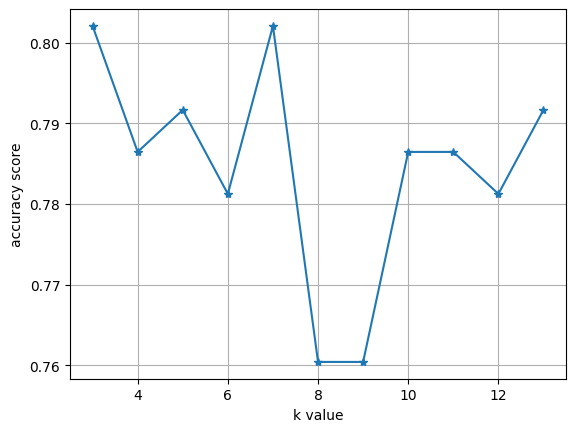

In [30]:
plt.plot(neighbors,metric_k,'*-')
plt.xlabel('k value')
plt.ylabel('accuracy score')
plt.grid()
plt.show()

In [ ]:
#k=1 or 7

In [31]:
classifier=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)#p=1 manhattan,p=2 euclidean based
classifier.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
y_pred_knn=classifier.predict(x_test)

In [33]:
confusion_matrix(y_test,y_pred_knn)

array([[112,  13],
       [ 25,  42]])

In [34]:
accuracy_score(y_test,y_pred_knn)

0.8020833333333334

In [35]:
precision_score(y_test,y_pred_knn)

0.7636363636363637

In [36]:
recall_score(y_test,y_pred_knn)

0.6268656716417911

In [37]:
f1_score(y_test,y_pred_knn)

0.6885245901639345